Starting training...
Model checkpoints will be saved to ../model_checkpoints
Using existing preprocessed files found at:
  - Training data: ../data\train.parquet
  - Validation data: ../data\val.parquet
Loading a small sample of data to fit the pipeline...
Creating model with 6 venues and 3 actions
Creating data generators from preprocessed files...
Preprocessed data contains 128639 observations
Preprocessed data contains 32160 observations

--- Epoch 1/1 ---
Training phase:
Training on chunk 1 with 20000 observations


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ venue_input         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ action_input        │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trade_input         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ venue_embedding     │ (None, 100, 8)    │         48 │ venue_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ action_embedding    │ (None, 100, 8)    │         24 │ action_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trade_embedding     │ (None, 100, 8)    │         16 │ trade_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 100, 6)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100, 30)   │          0 │ venue_embedding[… │
│ (Concatenate)       │                   │            │ action_embedding… │
│                     │                   │            │ trade_embedding[… │
│                     │                   │            │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 64)        │     18,432 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 64)        │     18,432 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ gru[0][0],        │
│ (Concatenate)       │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 24)        │      1,560 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 46,768 (182.69 KB)

 Trainable params: 46,768 (182.69 KB)

 Non-trainable params: 0 (0.00 B)

20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 758ms/step - accuracy: 0.0476 - loss: 3.3005
Training on chunk 2 with 20000 observations
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 835ms/step - accuracy: 0.0909 - loss: 2.9895
Training on chunk 3 with 20000 observations
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 755ms/step - accuracy: 0.1368 - loss: 2.6891
Training on chunk 4 with 20000 observations
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 874ms/step - accuracy: 0.1747 - loss: 2.5240
Training on chunk 5 with 20000 observations
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1988 - loss: 2.4362
Training on chunk 6 with 20000 observations
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2162 - loss: 2.3434
Training on chunk 7 with 8639 observations
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2321 - loss: 2.3196
Epoch 1 average training loss: 2.6186
Validation phase:
Validating on chunk 1
Validating on chunk 2
Epoch 1 validation loss: 2.3135
Model saved to ../model_checkpoints\model_epoch1_chunk1.pkl
New best model saved wit

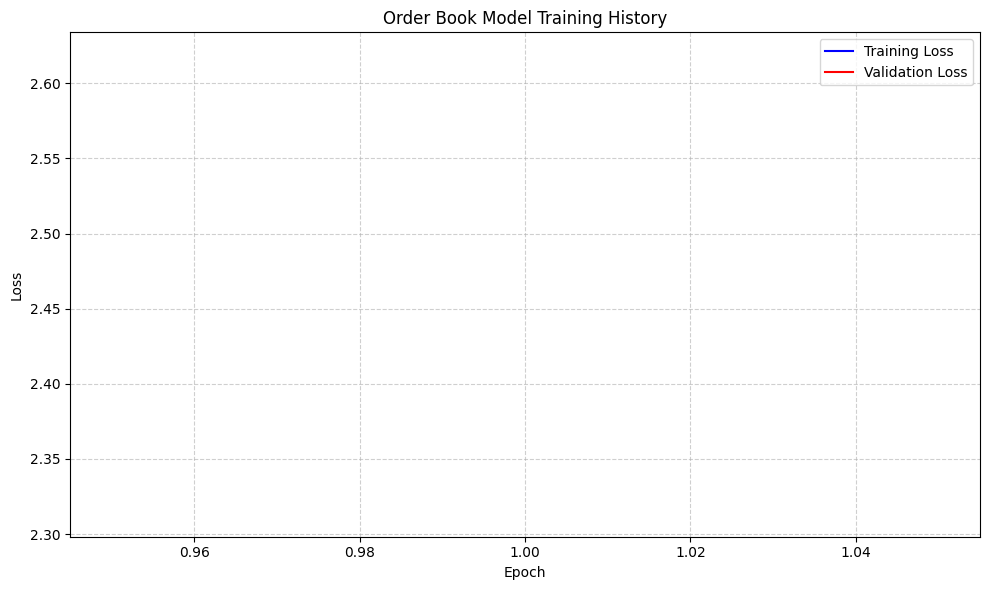

In [1]:
import sys
import os
import pickle  # Added this since you're using pickle.dump

# Add the parent directory to the path
sys.path.append(os.path.abspath('..'))

# Import your modularized code
from order_book.preprocessing import create_order_book_pipeline
from order_book.models import OrderBookEmbeddingModel
from order_book.utils import main, plot_loss_history

# Define file paths
X_train_path = "../data/X_train.parquet"
y_train_path = "../data/y_train.csv"

# Train the model
model, pipeline, history = main(
    X_path=X_train_path,
    y_path=y_train_path,
    batch_size=1000,
    chunk_size=20000,
    n_epochs=1,
    val_split=0.2,
    visualize=False,
    n_samples_to_visualize=0,
    output_dir="../model_checkpoints",
    model_save_dir="../model_checkpoints",
    preprocessed_dir="../data",
    use_existing_preprocessed=True
)

train_losses, val_losses = history['train_loss'], history['val_loss']
plot_loss_history(train_losses, val_losses, title="Order Book Model Training History")

Selecting a batch of observations for feature importance analysis...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch size: 50 observations
Classes in batch: [ 1  2  3  4  5  6  7  8  9 11 12 13 15 16 18 19 21 23]
Class distribution: {19: 11, 18: 6, 5: 5, 13: 5, 23: 3, 12: 3, 11: 2, 4: 2, 6: 2, 15: 2, 1: 2, 7: 1, 8: 1, 16: 1, 9: 1, 3: 1, 21: 1, 2: 1}
Calculating permutation feature importance (this may take a few minutes)...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
2/2 

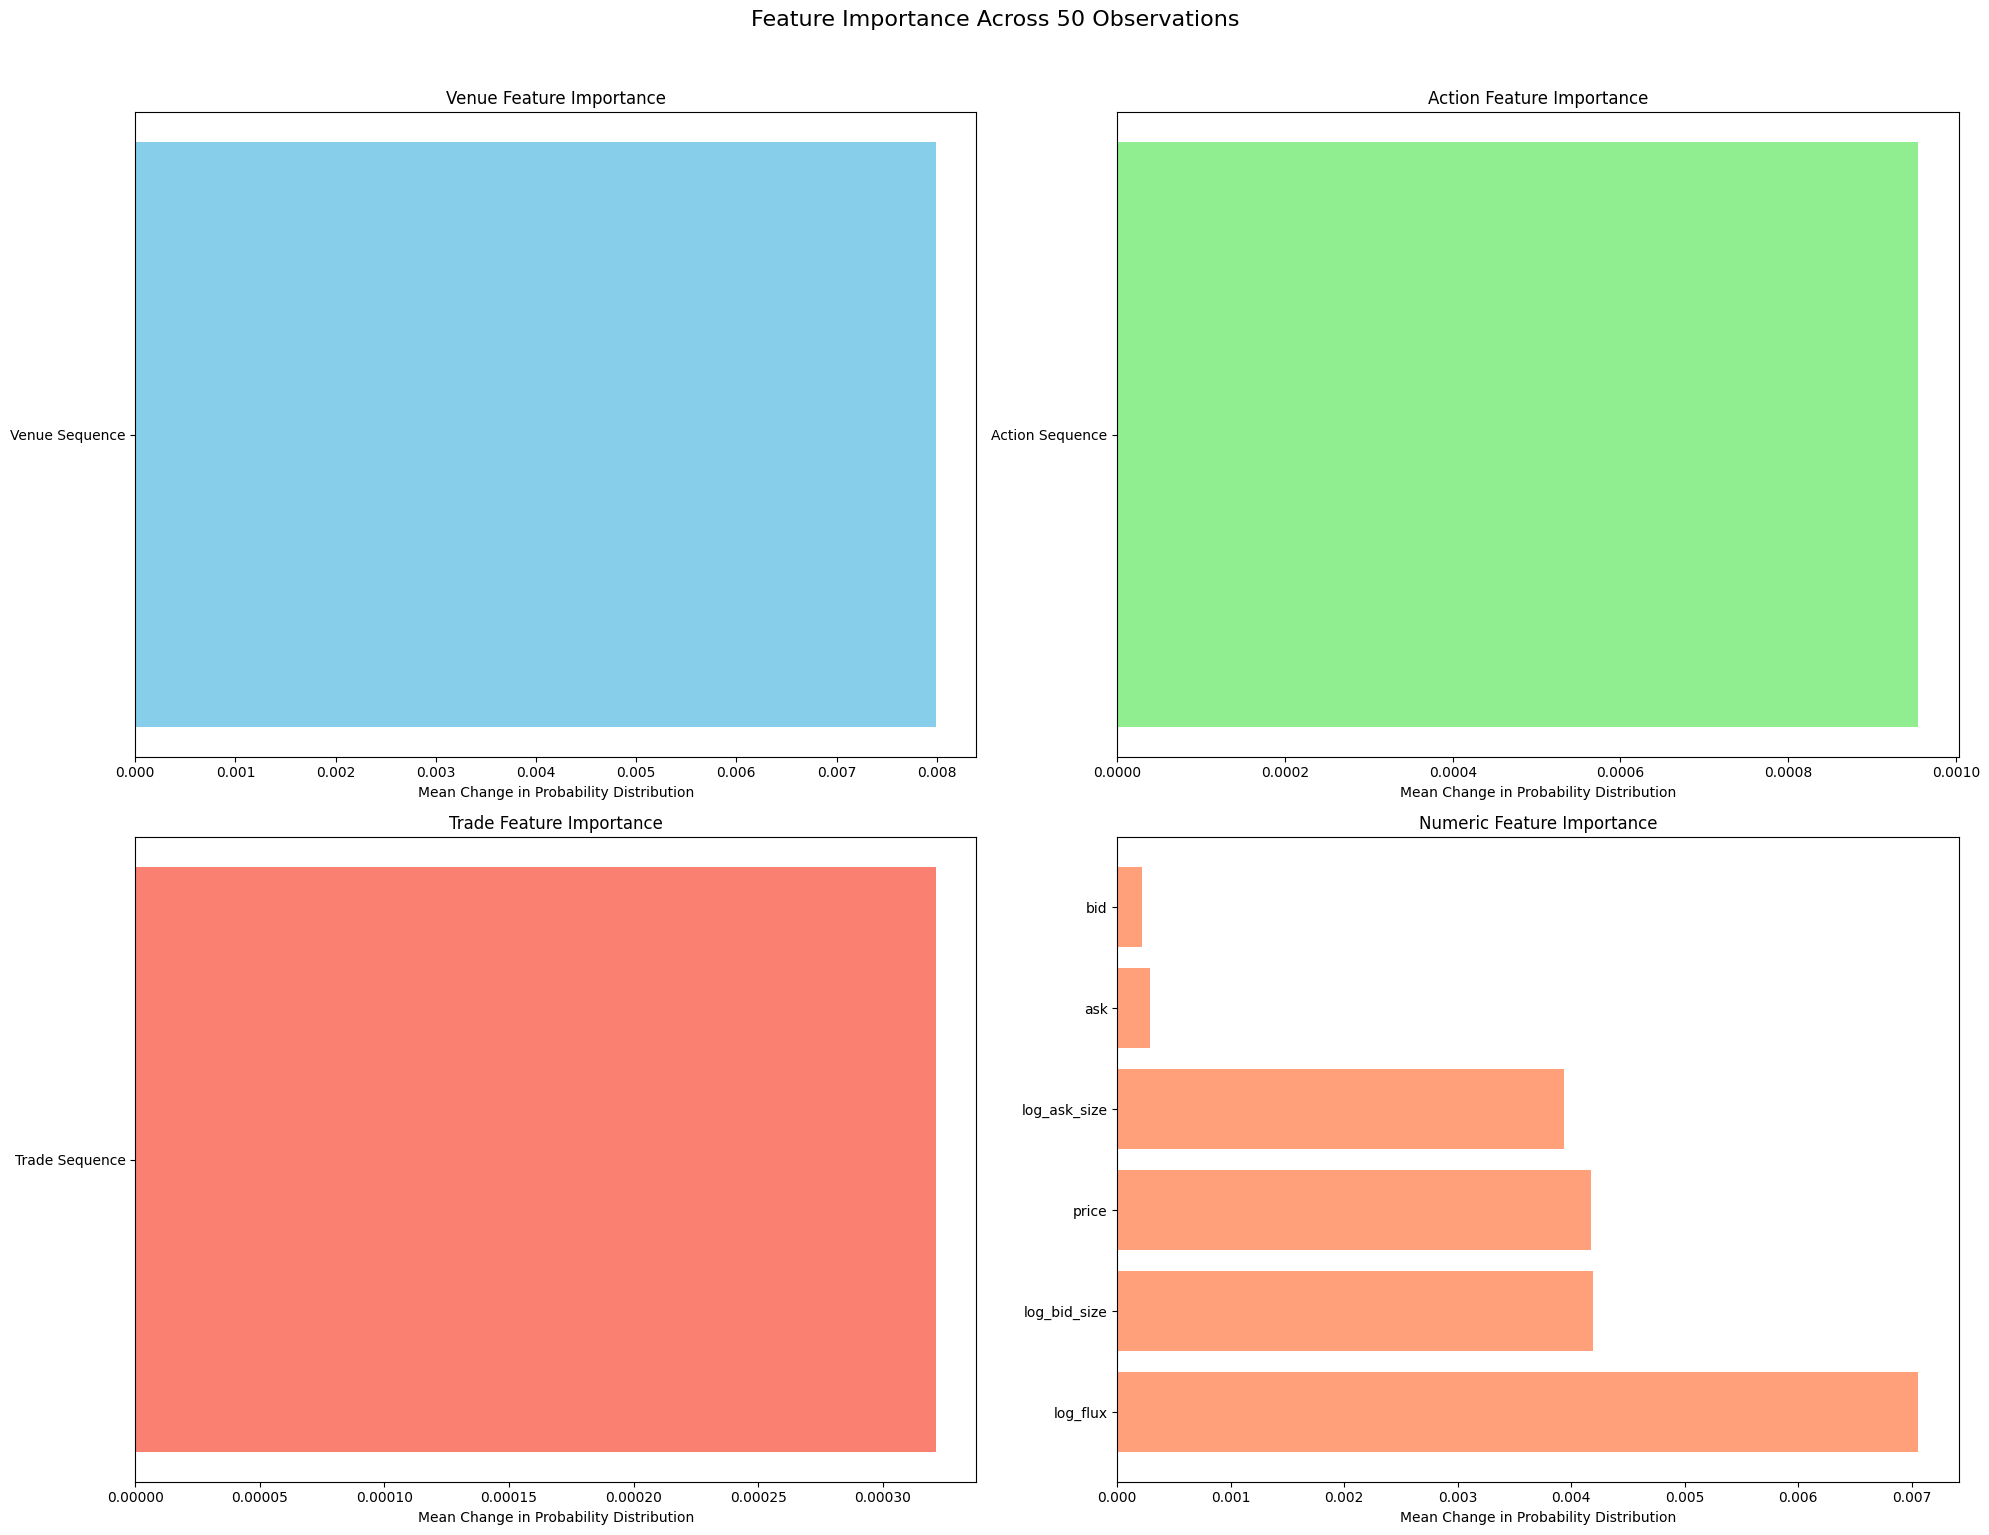

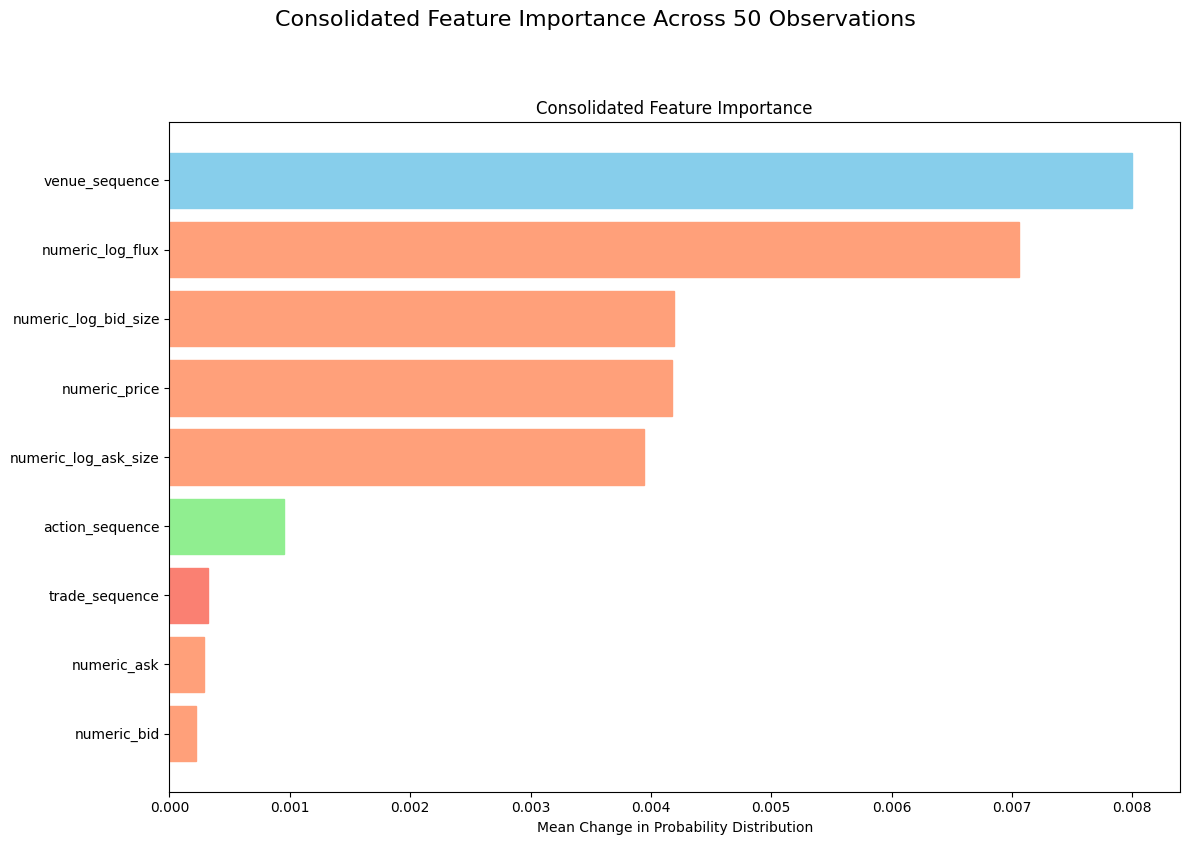

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time

# Add the project root directory to Python's path
sys.path.append(os.path.abspath(".."))

# Load model and pipeline
with open("../model_checkpoints/final_model.pkl", "rb") as f:
    checkpoint_data = pickle.load(f)
    model = checkpoint_data['model']
    pipeline = checkpoint_data['pipeline']

# Load test data
X_test = pd.read_parquet("../data/X_test.parquet")

# Sample multiple observations (50) for more robust feature importance
print("Selecting a batch of observations for feature importance analysis...")
num_samples = 50
sample_obs_ids = np.random.choice(X_test['obs_id'].unique(), min(num_samples, len(X_test['obs_id'].unique())), replace=False)
batch_data = X_test[X_test['obs_id'].isin(sample_obs_ids)]

# Process through pipeline
X_batch, obs_ids = pipeline.transform(batch_data)

# Get predictions for the batch
predictions = model.predict(X_batch)
unique_classes = np.unique(predictions)
print(f"Batch size: {len(sample_obs_ids)} observations")
print(f"Classes in batch: {unique_classes}")
print(f"Class distribution: {pd.Series(predictions).value_counts().to_dict()}")

# Calculate permutation feature importance on the batch
print("Calculating permutation feature importance (this may take a few minutes)...")
start_time = time.time()
importance_scores = model.permutation_feature_importance(X_batch, n_repeats=10)
print(f"Permutation importance calculation completed in {time.time() - start_time:.2f} seconds")

# Original detailed visualization (grouped by feature type)
fig = model.visualize_feature_importance(importance_scores, consolidated=False)
plt.figure(fig.number)
plt.suptitle(f"Feature Importance Across {len(sample_obs_ids)} Observations", 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Save the original visualization
fig.savefig(f"feature_importance_batch_{len(sample_obs_ids)}_obs.png", dpi=300, bbox_inches='tight')

# Create consolidated visualization (all features in one plot)
consolidated_fig = model.visualize_feature_importance(importance_scores, consolidated=True)
plt.figure(consolidated_fig.number)
plt.suptitle(f"Consolidated Feature Importance Across {len(sample_obs_ids)} Observations",
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Save the consolidated visualization
consolidated_fig.savefig(f"consolidated_feature_importance_{len(sample_obs_ids)}_obs.png", 
                        dpi=300, bbox_inches='tight')

In [ ]:
import pandas as pd
import numpy as np
import pickle
import os
import sys

# Add the project root directory to Python's path
sys.path.append(os.path.abspath(".."))

# Load the saved model and pipeline correctly
with open("../model_checkpoints/final_model.pkl", "rb") as f:
    checkpoint_data = pickle.load(f)
    model = checkpoint_data['model']
    pipeline = checkpoint_data['pipeline']

# Define paths
X_test_path = "../data/X_test.parquet"  # Path to test data
output_path = "../data/y_submission.csv"  # Path to save predictions

# Load test data
X_test = pd.read_parquet(X_test_path)

# Get unique observation IDs
observation_ids = X_test['obs_id'].unique()
predictions = []

# Define chunk size
chunk_size = 10000  # Adjust based on your memory constraints and model

# Process observations in chunks
print(f"Processing {len(observation_ids)} observations in chunks of {chunk_size}...")

# Create chunks of observation IDs
chunks = [observation_ids[i:i + chunk_size] for i in range(0, len(observation_ids), chunk_size)]

for chunk_idx, chunk_obs_ids in enumerate(chunks):
    print(f"Processing chunk {chunk_idx+1}/{len(chunks)}")
    
    # Get data for current chunk of observations
    chunk_data = X_test[X_test['obs_id'].isin(chunk_obs_ids)]
    
    # Process the chunk through the pipeline
    # The pipeline returns a tuple: (data_dict, obs_ids)
    X_dict, processed_obs_ids = pipeline.transform(chunk_data)
    
    # Create a mapping to ensure predictions align with original chunk_obs_ids
    obs_id_to_position = {obs_id: i for i, obs_id in enumerate(processed_obs_ids)}
    
    # Make predictions using the model
    chunk_predictions = model.predict(X_dict, explain=True, visualize=True)
    
    # Store results, ensuring we have the right observation IDs
    for i, obs_id in enumerate(processed_obs_ids):
        if obs_id in chunk_obs_ids:  # Just a safety check
            predictions.append((obs_id, int(chunk_predictions[i])))

# Create submission DataFrame
submission_df = pd.DataFrame(predictions, columns=['obs_id', 'eqt_code_cat'])

# Save to CSV
submission_df.to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")

Processing 81600 observations in chunks of 10000...
Processing chunk 1/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step
Processing chunk 2/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step
Processing chunk 3/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step
Processing chunk 4/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step
Processing chunk 5/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step
Processing chunk 6/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step
Processing chunk 7/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step
Processing chunk 8/9
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step
Processing chunk 9/9
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
Predictions saved to ../data/y_submission.csv


In [ ]:
# Add this to a cell in project.ipynb
import sys
import os
import nest_asyncio
import uvicorn
from threading import Thread
import time
from pyngrok import ngrok

# Add project root to path if needed
if not os.path.abspath('..') in sys.path:
    sys.path.append(os.path.abspath('..'))

# Import your FastAPI app
from api.main import app

# Apply nest_asyncio to allow running asyncio in notebook
nest_asyncio.apply()

# Function to run the server in a separate thread
def run_server_in_thread(port=8000):
    uvicorn.run(app, host="0.0.0.0", port=port)

# Create a function to start/stop server with optional ngrok
def start_api_server(port=8000, use_ngrok=False, ngrok_token=None):
    global server_thread, public_url
    
    # Configure ngrok if needed
    if use_ngrok:
        if ngrok_token:
            ngrok.set_auth_token(ngrok_token)
        public_url = ngrok.connect(port)
        print(f"📡 Public URL: {public_url}")
        
    # Start server in a thread
    server_thread = Thread(target=run_server_in_thread, args=(port,), daemon=True)
    server_thread.start()
    
    # Wait for server startup
    time.sleep(1)
    print(f"🚀 API server running at http://localhost:{port}")
    print(f"📚 API documentation at http://localhost:{port}/docs")
    
    return server_thread

# Function to stop the server
def stop_api_server():
    # Disconnect ngrok tunnels
    try:
        ngrok.disconnect_all()
        print("📡 Ngrok tunnel closed")
    except:
        pass
    
    print("🛑 API server stopping - notebook kernel will need to be restarted")
    # To fully stop the server, you'll need to restart the kernel

# Start the API server
server_thread = start_api_server(port=8000, use_ngrok=False)